## About Dataset
The dataset contains a sample of 1000 customers who are withdrawing their membership from the bank due to some loss and other issues. The data is owned by Santosh Kumar and published on Kaggle.com

## Import Libraries

In [2]:
#Import Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import dataset

In [3]:
#Read CSV
df = pd.read_csv("Churn Modeling.csv")

## Cleaning Data

### 1. Delete columns

In [4]:
#Display the top 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Dimensions
df.shape

(10000, 14)

**NOTE**
<br>
The `RowNumber` column is not necessary for this project. Therefore it will be dropped.

### 2. Check duplicate entries

In [6]:
df['CustomerId'].duplicated().value_counts()

CustomerId
False    10000
Name: count, dtype: int64

**NOTE**
<br>
Customer records were not duplicated.

### 2.1 Drop unwanted columns

In [7]:
#Drop RowNumber, Surnamne and CustomerId Colounns
df = df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3. Check null values

In [8]:
#Check missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#Check unique values to check for unknown values
for col in df.iloc[:,1:12]:
    print(df[col].value_counts())

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
Age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64
Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: count, dtype: int64
Balance
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: count, Length: 6382, dtype: int64
NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64
HasCrCard
1    7055
0    2945
Name: count, dtype: int64
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64
EstimatedSalary
24924.92     2
101348.88    1
55313.44     1
72500.68     1
182692.80    1
            .

**NOTE**
<br>
There are no null or unknown values.

### 4. Separate dataset into numerical and categorical

In [10]:
df.describe(include='all')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [11]:
#List of categorical features
categorical = []
for col in df:
    if df[col].dtypes == 'object':
        categorical.append(col)
categorical

['Geography', 'Gender']

In [12]:
#List of numerical features
numerical = []
for col in df:
    if df[col].dtypes == 'int64' or df[col].dtypes == 'float64':
        numerical.append(col)
#Remove CustomerId
numerical = numerical[:]
numerical

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

**NOTE**
<br>
HasCrCard, IsActiveMember, and Exited are actually categorical variables.

In [14]:
#Transfer HasCrCard, IsActiveMember, and Exited to the categorical list
for i in ['HasCrCard','IsActiveMember','Exited']:
    numerical.remove(i)
for i in ['HasCrCard','IsActiveMember','Exited']:
    categorical.append(i)

In [15]:
print('Numerical=', numerical)
print('Categorial', categorical)

Numerical= ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
Categorial ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']


## Exploratory Data Analysis

### 1. Dispersion of data

In [16]:
#Check Coefficient of Variation
from scipy.stats import variation
variation(df[numerical])

array([0.14856908, 0.26944494, 0.57692901, 0.81576204, 0.38009755,
       0.57455769])

**NOTE**
<br>
`Balance`is the most dispersed varibale in the dataset.

### 2.  Numerical Variables (Continous and Discrete)

**Numerical Columns**: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

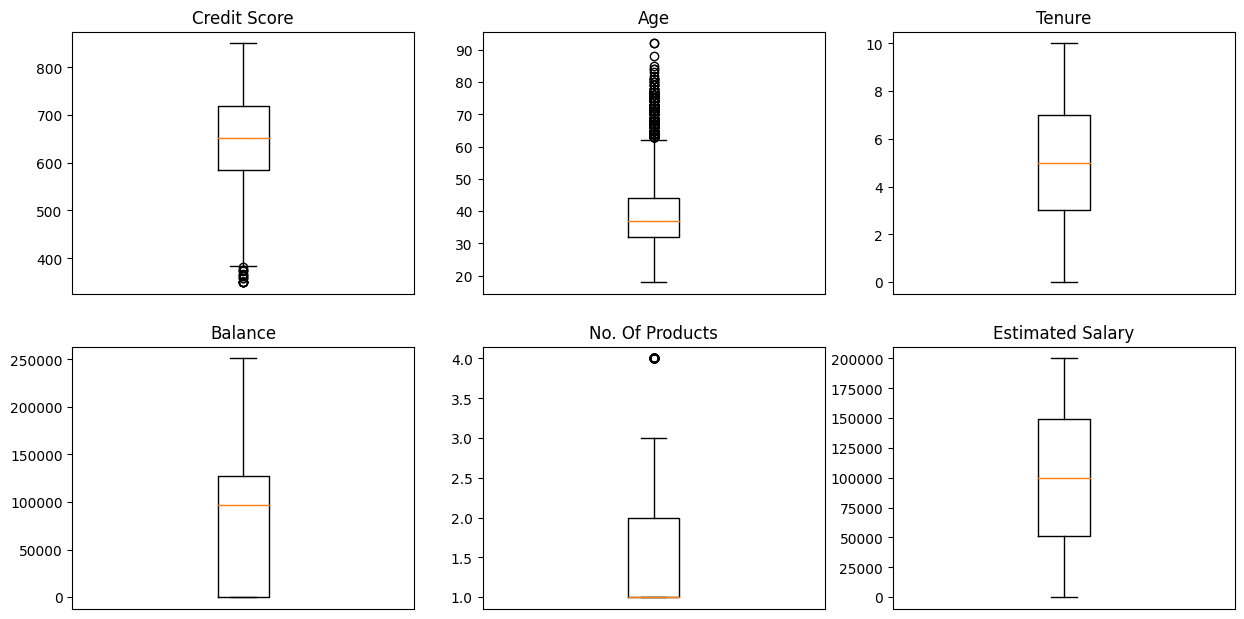

In [17]:
#Boxplots for Continuos Variables
fig, ax = plt.subplots(2,3, figsize=(15,7.5))

ax[0,0].boxplot(df['CreditScore'])
ax[0,0].set_title('Credit Score')
ax[0,0].set_xticks([])

ax[0,1].boxplot(df['Age'])
ax[0,1].set_title('Age')
ax[0,1].set_xticks([])

ax[0,2].boxplot(df['Tenure'])
ax[0,2].set_title('Tenure')
ax[0,2].set_xticks([])

ax[1,0].boxplot(df['Balance'])
ax[1,0].set_title('Balance')
ax[1,0].set_xticks([])

ax[1,1].boxplot(df['NumOfProducts'])
ax[1,1].set_title('No. Of Products')
ax[1,1].set_xticks([])

ax[1,2].boxplot(df['EstimatedSalary'])
ax[1,2].set_title('Estimated Salary')
ax[1,2].set_xticks([])


plt.show();

In [18]:
#Calculate outliers for Age
age_iqr = np.quantile(df['Age'],0.75) - np.quantile(df['Age'],0.25)
age_iqr

12.0

In [19]:
age_q1 = np.quantile(df['Age'],0.25)
age_q1

32.0

In [20]:
age_q3 = np.quantile(df['Age'],0.75)
age_q3

44.0

In [21]:
age_lower_bound = age_q1 - (1.5 * age_iqr)
age_lower_bound

14.0

In [22]:
age_upper_bound = age_q3 + (1.5 * age_iqr)
age_upper_bound

62.0

In [23]:
#How many clients are above the upper limit
retired = df.query("Age > 62")
retired.groupby('Exited').count()['Age']

Exited
0    286
1     73
Name: Age, dtype: int64

**NOTE**
<br>
`Age` boxplot: Most of the members are working class. Members older than 62 years are outliers. This is the age close to retirement. 359 out 1000 are close to retiremenent age. Only 73 of customers above 62 exited the bank.

In [24]:
#Calculate the correlation table for numerical values
df[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


**NOTE**
<br>
There is no linear relationship between the varibles. Therefore a linear regression is not suitable for this dataset.

### 3. Categorical Variables (Nominal and Ordinal)

**Categorical columns**: Geography, Gender, HasCrCard, IsActiveMember, Exited

In [25]:
#Create Dataframe for Categorical Variables
Geography = df['Geography'].value_counts().to_frame()
Geography = Geography.reset_index()

Gender = df['Gender'].value_counts().to_frame()
Gender = Gender.reset_index()

HasCreditCard = df['HasCrCard'].value_counts().to_frame()
HasCreditCard = HasCreditCard.reset_index()

IsActiveMember = df['IsActiveMember'].value_counts().to_frame()
IsActiveMember = IsActiveMember.reset_index()

Exited = df['Exited'].value_counts().to_frame()
Exited = Exited.reset_index()

print(Geography)
print(Gender)
print(HasCreditCard)
print(IsActiveMember)
print(Exited)


  Geography  count
0    France   5014
1   Germany   2509
2     Spain   2477
   Gender  count
0    Male   5457
1  Female   4543
   HasCrCard  count
0          1   7055
1          0   2945
   IsActiveMember  count
0               1   5151
1               0   4849
   Exited  count
0       0   7963
1       1   2037


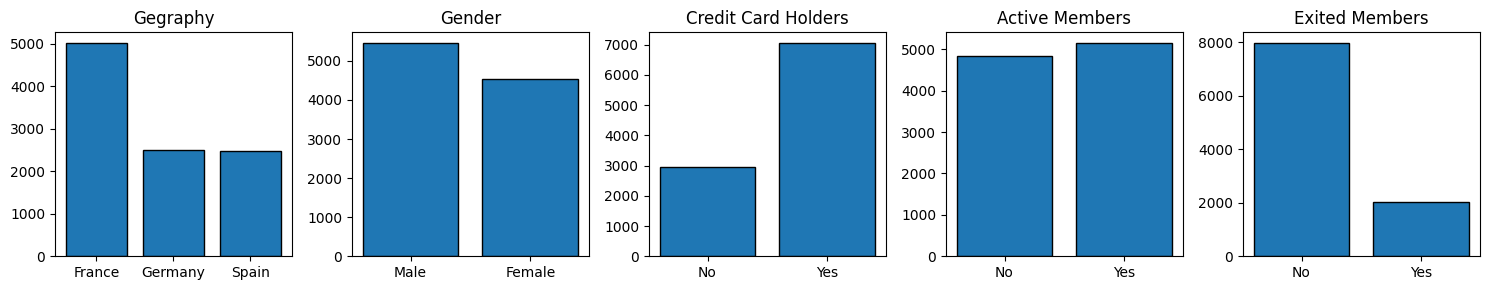

In [26]:
#Create bar graphs for Categorical Variables
fig, ax = plt.subplots(1,5, figsize=(15,3))

ax[0].bar(Geography.iloc[:,0], Geography.iloc[:,1], edgecolor='black')
ax[0].set_title('Gegraphy')
# ax[3].set_xticks([0,1], ['No','Yes'])

ax[1].bar(Gender.iloc[:,0], Gender.iloc[:,1], edgecolor='black')
ax[1].set_title('Gender')
ax[1].set_xticks([0,1], ['Male','Female'])

ax[2].bar(HasCreditCard.iloc[:,0], HasCreditCard.iloc[:,1], edgecolor='black')
ax[2].set_title('Credit Card Holders')
ax[2].set_xticks([0,1], ['No','Yes'])

ax[3].bar(IsActiveMember.iloc[:,0], IsActiveMember.iloc[:,1], edgecolor='black')
ax[3].set_title('Active Members')
ax[3].set_xticks([0,1], ['No','Yes'])

ax[4].bar(Exited.iloc[:,0], Exited.iloc[:,1], edgecolor='black')
ax[4].set_title('Exited Members')
ax[4].set_xticks([0,1], ['No','Yes'])


fig.tight_layout()

plt.show();

**NOTE**
<br>
`Exited` is imbalanced; thus, stratified sampling will be used when splitting the data.

In [27]:
# Cross tabulation
CrosstabResult=pd.crosstab(df['Exited'], df['Geography'])

# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


The P-Value of the ChiSq Test is: 3.830317605354266e-66


In [28]:
# Cross tabulation 
CrosstabResult=pd.crosstab(df['Exited'], df['Gender'])

# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.2482100097131755e-26


In [29]:
# Cross tabulation 
CrosstabResult=pd.crosstab(df['Exited'], df['HasCrCard'])

# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.49237236141554697


In [30]:
# Cross tabulation between surname and geography
CrosstabResult=pd.crosstab(df['Exited'], df['IsActiveMember'])

# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 8.785858269303705e-55


**NOTE**
<br>
Exited vs. Geography: p-value < 0.05; Accept the Null hypothesis, which is that the categories are not related. They are not related.<br>
Exited vs. Gender: p-value < 0.05; Accept the Null hypothesis, which is that the categories are not related. They are not related.<br>
Exited vs. HasCrCard: p-value > 0.05; Reject the Null hypothesis, which is that the categories are not related. They are related.<br>
Exited vs. IsActiveMember: p-value < 0.05; Accept the Null hypothesis, which is that the categories are not related. They are not related.<br>

## Train,Test and Export Model

### 1. Split Dataset

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [32]:
df.shape

(10000, 11)

In [33]:
#Import libraries
from sklearn.model_selection import train_test_split

In [34]:
#Create dependent and independent variable sets
x = df.drop(['Exited'], axis=1)
y = df['Exited']

In [35]:
#Split variable sets into train and test data. Stratified sampling used.
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True,test_size=0.2, stratify=y)

In [36]:
x_train.shape

(8000, 10)

In [37]:
x_test.shape

(2000, 10)

### 2. Import Libraries

In [42]:
#Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [39]:
from sklearn.metrics import accuracy_score

### 3. Transformation Pipelines

In [46]:
numeric_transformer=Pipeline(
    steps=[("scaler", StandardScaler())]
)

In [52]:
categorical_transformer=Pipeline(
    steps=[("encoder", OneHotEncoder(handle_unknown="ignore"))]
)

In [73]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer,['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']),
        ("cat", categorical_transformer, ['Geography','Gender'])]
)

### 4. Transform Data

In [75]:
x_train_transformed = preprocessor.fit_transform(x_train)

In [77]:
x_test_transformed = preprocessor.fit_transform(x_test)

#### 5.1 Support Vector Classifier

In [82]:
#Train the model
svm_model = SVC().fit(x_train_transformed,y_train)

In [83]:
#Predict values
y_pred = svm_model.predict(x_test_transformed)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
#Accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.8435


#### 5.2 Gaussian Naive Bayes

In [85]:
#Train the model
nb_model = GaussianNB().fit(x_train_transformed,y_train)

In [86]:
#Predict values
y_pred = nb_model.predict(x_test_transformed)

In [87]:
#Accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.8105


#### 5.3 Logistic Regression

In [88]:
#train the model
lr_model = LogisticRegression().fit(x_train_transformed, y_train)

In [89]:
#Predict values
y_pred = lr_model.predict(x_test_transformed)

In [90]:
#Accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.799


#### 5.4 Decision Tree Classifier

In [91]:
#Train model
dt_model = DecisionTreeClassifier().fit(x_train_transformed,y_train)

In [92]:
#Predict values
y_pred = dt_model.predict(x_test_transformed)

In [93]:
#Accuracy score
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

Accuracy Score: 0.7675


Support Vector Machine Performed the best.

#### 5.5 Export Model

In [94]:
import pickle

In [95]:
data = {"preprocesor": preprocessor,"classifier": svm_model}

In [96]:
file = open("Churn_Model.pkl", 'wb')

In [97]:
pickle.dump(data,file)